In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.charts import Bar
import thinkstats2
import thinkplot
from scipy import stats
from livestockwatch.manualdata_utils import DataProvider
output_notebook()

[Errno 2] No such file or directory: 'logging.json'


/Users/fitram/anaconda/envs/livestockwatch/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Loading BokehJS ...

In [2]:
def ttest_onesided(high_vita, low_vita, confidence_interval, ttest_variant="welch"):
    # Welch’s t-test, independent variable
    high_vita_name, high_vita_dataset = high_vita
    low_vita_name, low_vita_dataset = low_vita
    
    if ttest_variant == "welch":
        tstat, pval = stats.ttest_ind(high_vita_dataset, low_vita_dataset, equal_var=False)
    elif ttest_variant == "student":
        tstat, pval = stats.ttest_rel(high_vita_dataset, low_vita_dataset)
        
    one_tailed_pval = pval/2
    
    pval_critical = 1 - (confidence_interval / 100)
    if one_tailed_pval < pval_critical:
        print("PVALUE = {} (P-Critical = {})".format(one_tailed_pval, pval_critical))
        print("Tstatistics = {}".format(tstat))
        print("{} is significantly different than {}".format(high_vita_name, low_vita_name))
        if tstat > 0:
            print("{} > {}".format(high_vita_name, low_vita_name))
        elif tstat < 0:
            print("{} < {}".format(high_vita_name, low_vita_name))
    else:
        print("High group is not significantly different")

def calculate_iqr_limit(series):
    q1 = series.quantile(q=0.25)
    q2 = series.quantile(q=0.5)
    q3 = series.quantile(q=0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    print("upper limit = {}".format(upper))
    print("lower limit = {}".format(lower))
    return float(upper), float(lower)

def get_outlier(df, col_name):
    uplim, lowlim = calculate_iqr_limit(df[col_name])
    return df[(df[col_name] < lowlim) | df[col_name] > uplim]

In [3]:
ipr_path = "ipr.xlsx"
if not os.path.exists(ipr_path):
    base_path = "/Volumes/fitramhd/BISE/WA02_month/"
    lst_excel_path = [
        os.path.join(base_path, "2015-7-data.xlsx"),
        os.path.join(base_path, "2015-6-data.xlsx"),
        os.path.join(base_path, "manual_data.xlsx")
    ]
    lst_ipr_df = []

    data_provider = DataProvider(excel_result_path=ipr_path)

    for excel_path in lst_excel_path:
        ipr_df, _ = data_provider.process_excel_ipr(excel_path)
        if not ipr_df.empty:
            lst_ipr_df.append(ipr_df)

    lst_ipr_df.append(data_provider.process_mongo_ipr("livestockwatch"))

    if lst_ipr_df:
        data_provider.save_plr_data(lst_ipr_df)

In [4]:
excel_handler = pd.ExcelFile("ipr.xlsx")
excel_data = pd.read_excel(excel_handler, sheetname=None)
plr_df = excel_data["plr_all"]


# All region

HIGH VITA ALL REGION
count    122.000000
mean       0.981948
std        0.018455
min        0.886370
25%        0.974286
50%        0.987205
75%        0.995242
max        1.000833
Name: svg_ipr, dtype: float64


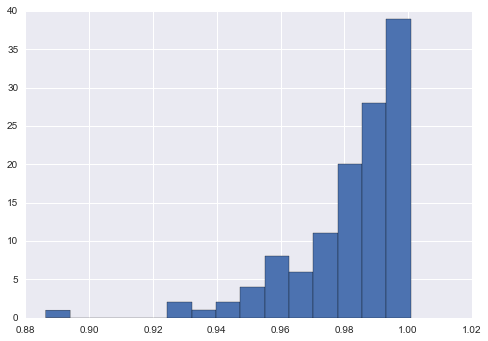

In [5]:
# HIGH VITA ALL REGION
hvar_df = plr_df[(plr_df.vit_a > 60) & (plr_df.same_region == True)]
print("HIGH VITA ALL REGION")
print(hvar_df.svg_ipr.describe())
hvar_df.svg_ipr.hist(bins=15)

upper limit = 1.0266751589443075
lower limit = 0.9428524298039928
HIGH VITA OUTLIER REMOVED
count    118.000000
mean       0.984035
std        0.014315
min        0.943127
25%        0.976957
50%        0.988734
75%        0.995275
max        1.000833
Name: svg_ipr, dtype: float64
n = 118


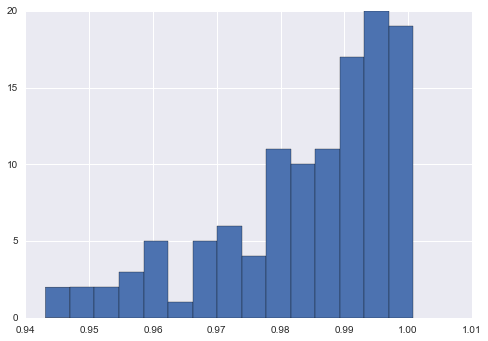

In [6]:
# HIGH VITA ALL REGION OUTLIER REMOVED
hvar_up_lim, hvar_low_lim = calculate_iqr_limit(hvar_df.svg_ipr)
hvar_wo_df = hvar_df[(hvar_low_lim <= hvar_df.svg_ipr) & (hvar_df.svg_ipr <= hvar_up_lim)]
print("HIGH VITA OUTLIER REMOVED")
print(hvar_wo_df.svg_ipr.describe())
hvar_wo_df.svg_ipr.hist(bins=15)
print("n = {}".format(len(hvar_wo_df)))

LOW VITA ALL REGION
count    238.000000
mean       0.976127
std        0.023712
min        0.855822
25%        0.965487
50%        0.984126
75%        0.993107
max        0.999833
Name: svg_ipr, dtype: float64


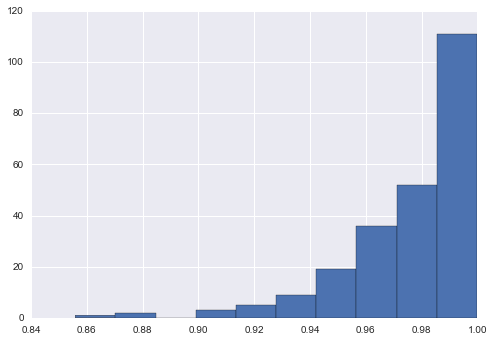

In [7]:
# LOW VITA ALL REGION
lvar_df = plr_df[(plr_df.vit_a < 30) & (plr_df.same_region == True)]
print("LOW VITA ALL REGION")
print(lvar_df.svg_ipr.describe())
lvar_df.svg_ipr.hist()

upper limit = 1.0345355526292248
lower limit = 0.9240584671647871
LOW VITA ALL REGION OUTLIER REMOVED
count    229.000000
mean       0.979087
std        0.018257
min        0.926753
25%        0.967936
50%        0.984593
75%        0.993395
max        0.999833
Name: svg_ipr, dtype: float64
n = 229


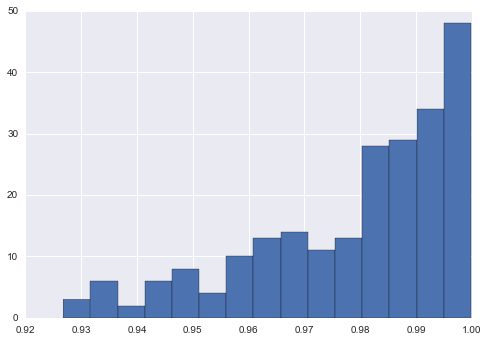

In [8]:
# LOW VITA ALL REGION OUTLIER REMOVED
lvar_up_lim, lvar_low_lim = calculate_iqr_limit(lvar_df.svg_ipr)
lvar_wo_df = lvar_df[(lvar_low_lim <= lvar_df.svg_ipr) & (lvar_df.svg_ipr <= lvar_up_lim)]
print("LOW VITA ALL REGION OUTLIER REMOVED")
print(lvar_wo_df.svg_ipr.describe())
lvar_wo_df.svg_ipr.hist(bins=15)
print("n = {}".format(len(lvar_wo_df)))

118
count    118.000000
mean       0.984035
std        0.014315
min        0.943127
25%        0.976957
50%        0.988734
75%        0.995275
max        1.000833
Name: svg_ipr, dtype: float64


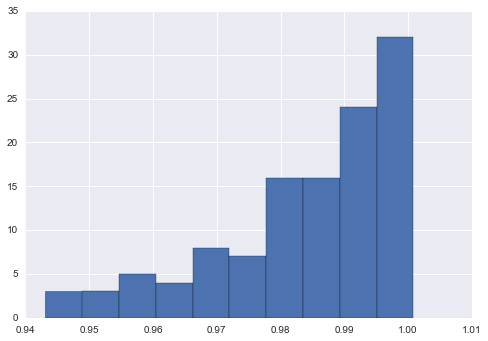

In [9]:
ipr_high_RA = hvar_wo_df.svg_ipr
print(ipr_high_RA.shape[0])
print(ipr_high_RA.describe())
ipr_high_RA.hist()

229
count    229.000000
mean       0.979087
std        0.018257
min        0.926753
25%        0.967936
50%        0.984593
75%        0.993395
max        0.999833
Name: svg_ipr, dtype: float64


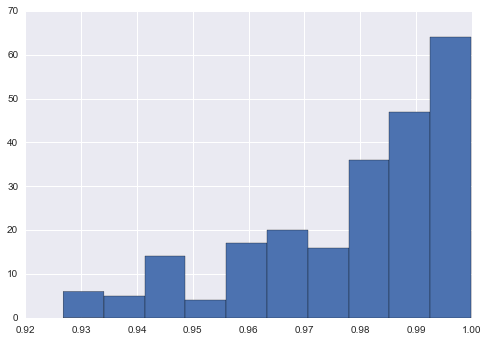

In [10]:
ipr_low_RA_s = lvar_wo_df.svg_ipr.sample(n=ipr_high_RA.shape[0])
ipr_low_RA = lvar_wo_df.svg_ipr
ipr_low_RA.hist()
print(ipr_low_RA.shape[0])
print(ipr_low_RA.describe())

## T-test dependent

In [11]:
ttest_onesided(("IPR High all region",ipr_high_RA), ("IPR low all region",ipr_low_RA_s), 95, ttest_variant="student")

PVALUE = 0.017320253493918022 (P-Critical = 0.050000000000000044)
Tstatistics = 2.1374769969219742
IPR High all region is significantly different than IPR low all region
IPR High all region > IPR low all region


## Welch’s t-test, independent variable, 95 % confidence interval

In [12]:
ttest_onesided(("IPR High all region",ipr_high_RA), ("IPR low all region",ipr_low_RA), 95, ttest_variant="welch")

PVALUE = 0.002988371114171316 (P-Critical = 0.050000000000000044)
Tstatistics = 2.7694340215962505
IPR High all region is significantly different than IPR low all region
IPR High all region > IPR low all region


In [13]:
p = figure(width=800, height=500,  x_axis_label = "Vit A (IU/DL)",
       y_axis_label = "IPR")
p.circle(lvar_wo_df.vit_a,lvar_wo_df.svg_ipr, size=10, color="red", alpha=0.5, legend="Low vitamin A < 30")
p.triangle(hvar_wo_df.vit_a,hvar_wo_df.svg_ipr, size=10, color="blue", alpha=0.5, legend="High vitamin A > 60")
show(p)

In [41]:
lvar_df["VADI"] = "LOW"
low_ipr = lvar_df[["ipr","VADI"]]
hvar_df["VADI"] = "HIGH"
high_ipr = hvar_df[["ipr","VADI"]]

/Users/fitram/anaconda/envs/livestockwatch/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/fitram/anaconda/envs/livestockwatch/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [42]:
ipr_df = pd.concat([high_ipr, low_ipr]).reset_index()
ipr_df = ipr_df.drop("index", 1)
ipr_df["fattening_period"] = "2014-2015"
ipr_writer = pd.ExcelWriter(os.path.join("/Users/fitram/Documents/BISE/master_thesis","ipr_vadi.xlsx"))
ipr_df.to_excel(ipr_writer, sheet_name="WA02", index=False)
ipr_writer.save()